In [15]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.image as mpimg
import optuna
from itertools import cycle
import seaborn as sns
import statsmodels.api as sm 
from scipy.interpolate import interp1d
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', 50)
plt.style.use('bmh')
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [2]:
%%time
oj = os.path.join
INPUT_DIR = '../input/m5-forecasting-accuracy/'
train = pd.read_csv(oj(INPUT_DIR, 'trainset.csv'))
price = pd.read_csv(oj(INPUT_DIR, 'sell_prices.csv'))
calendar = pd.read_csv(oj(INPUT_DIR, 'calendar.csv'))

sample_submit = pd.read_csv(oj(INPUT_DIR, 'submit.csv'))

CPU times: user 8.62 s, sys: 2.24 s, total: 10.9 s
Wall time: 14.9 s


In [4]:
holidays = calendar[['date', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2']]
holidays = holidays.rename(columns={'date': 'ds'})
holidays['lower_window'] = 0
holidays['upper_window'] = 1
holidays1 = holidays.dropna(subset = ['event_name_1'])
holidays2 = holidays.dropna(subset = ['event_name_2'])
holidays1 = holidays1[['ds', 'lower_window', 'upper_window', 'event_name_1']]
holidays1 = holidays1.rename(columns={'event_name_1': 'holiday'})
holidays2 = holidays2[['ds', 'lower_window', 'upper_window', 'event_name_2']]
holidays2 = holidays2.rename(columns={'event_name_2': 'holiday'})
holidays = pd.concat((holidays1, holidays2))
holidays = holidays.reset_index(drop=True)
print(holidays.head())


           ds  lower_window  upper_window        holiday
0  2011-02-06             0             1      SuperBowl
1  2011-02-14             0             1  ValentinesDay
2  2011-02-21             0             1  PresidentsDay
3  2011-03-09             0             1      LentStart
4  2011-03-16             0             1      LentWeek2


In [ ]:
def objective(trial):
    params = {'changepoint_prior_scale' : 
                 trial.suggest_uniform('changepoint_prior_scale',
                                       0.001,0.5
                                      ),
              'seasonality_prior_scale' : 
                 trial.suggest_uniform('seasonality_prior_scale',
                                       0.01,20
                                      ),
              'seasonality_mode' : 
                 trial.suggest_categorical('seasonality_mode',
                                           ['additive', 'multiplicative']
                                          ),
              'changepoint_range' : 
                  trial.suggest_discrete_uniform('changepoint_range', 
                                                 0.8, 1, 
                                                 0.01),
              'n_changepoints' : 
                  trial.suggest_int('n_changepoints', 
                                    20, 45),
             }
    
    model = Prophet(holidays=holidays,
    **params)
    model.fit(train_opt)

    
    forecast =  model.predict(val_opt)
    
    val_rmse = np.sqrt(mean_squared_error(val_opt.y, forecast.yhat))
    return val_rmse



/var/folders/xq/5x1ctvtx1mx1dtxfs8h7l4d80000gn/T/ipykernel_7637/1773184814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values
[I 2023-12-11 03:05:23,612] A new study created in memory with name: no-name-d72e7f4d-5ef6-47a1-9081-f01c3f16b2ed
/var/folders/xq/5x1ctvtx1mx1dtxfs8h7l4d80000gn/T/ipykernel_7637/1167051525.py:3: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  trial.suggest_uniform('changepoint_prior_scale',
/var/folders/xq/5x1ctvtx1mx1dtxfs8h7l4d80000gn/T/ipykernel_7637/1167051525.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This featu

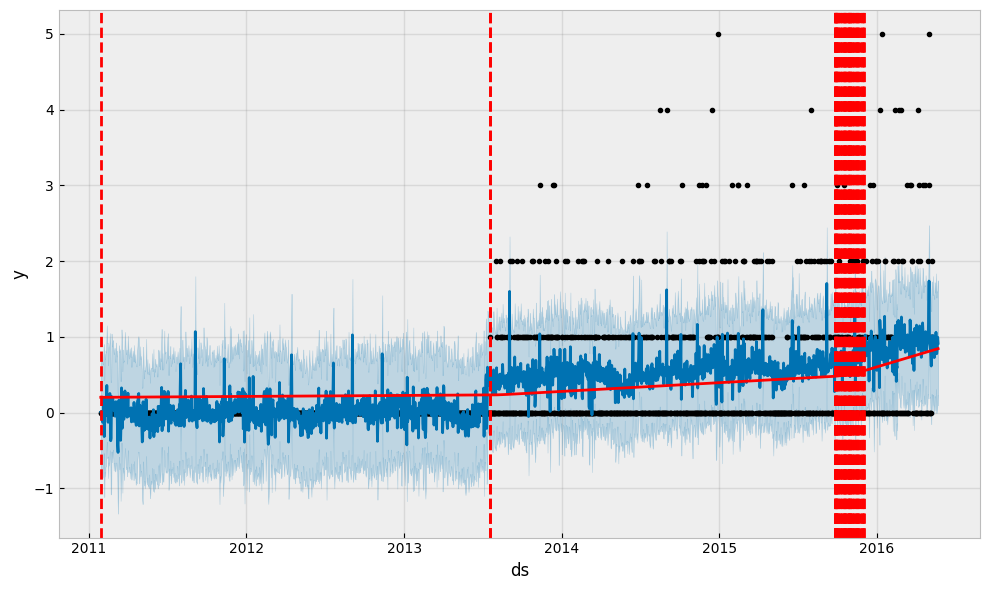

/usr/local/lib/python3.9/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.9/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.9/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on t

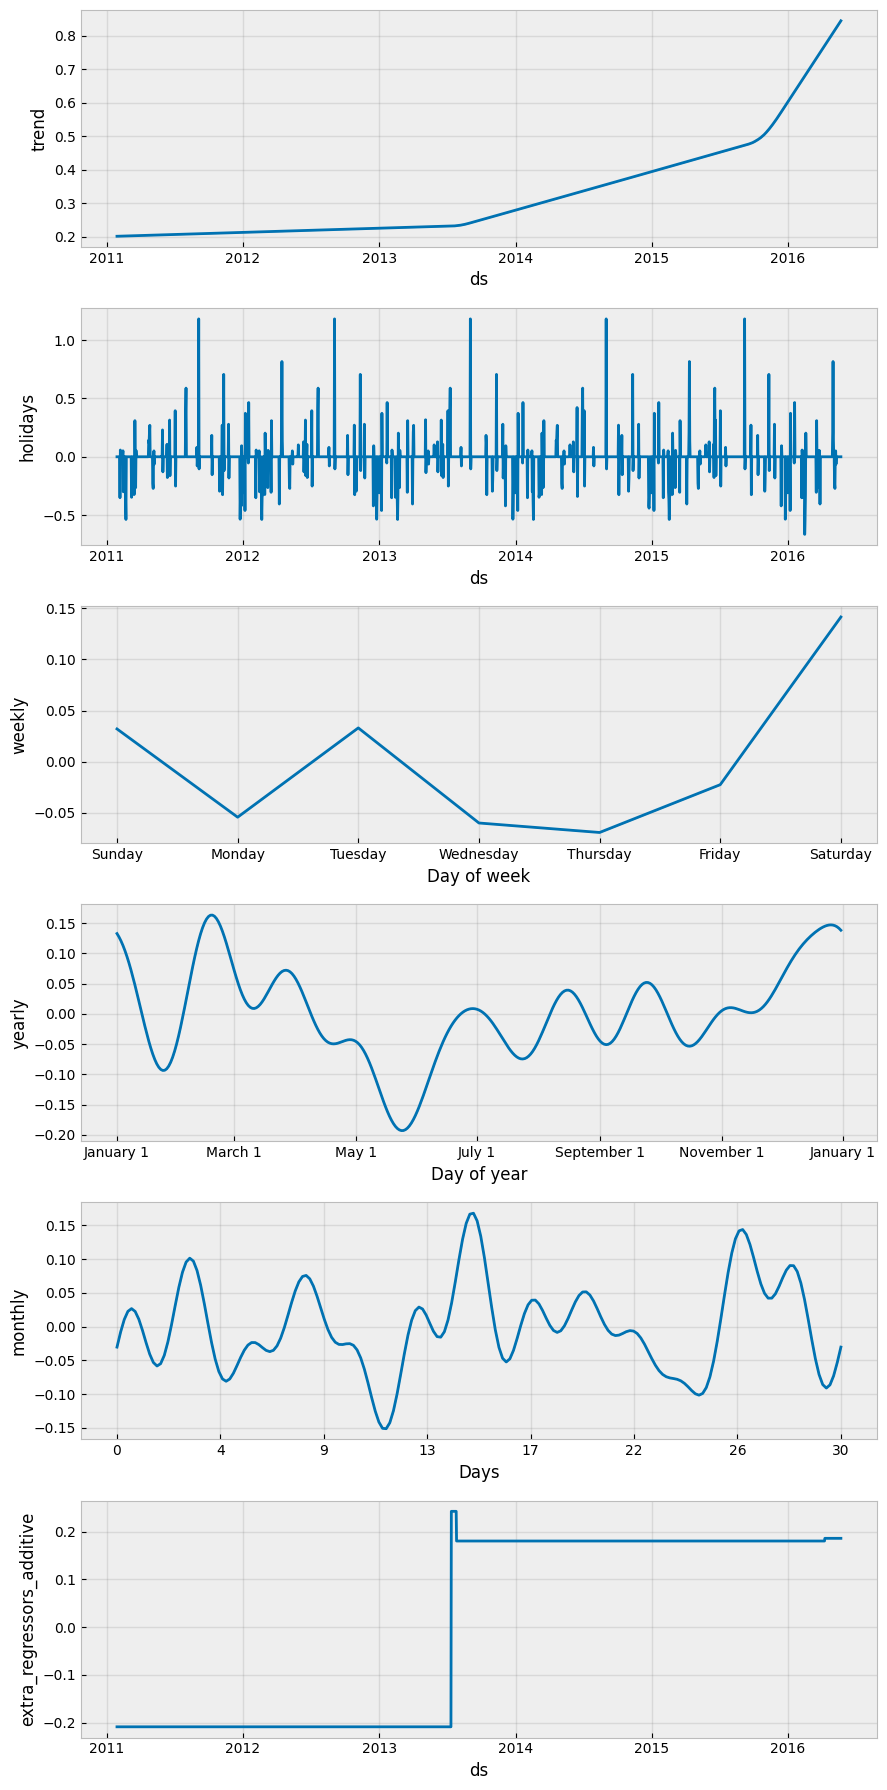

/var/folders/xq/5x1ctvtx1mx1dtxfs8h7l4d80000gn/T/ipykernel_7637/1773184814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values
[I 2023-12-11 03:05:36,569] A new study created in memory with name: no-name-081639a9-21e9-4544-b386-55cceea4c213
/var/folders/xq/5x1ctvtx1mx1dtxfs8h7l4d80000gn/T/ipykernel_7637/1167051525.py:3: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  trial.suggest_uniform('changepoint_prior_scale',
/var/folders/xq/5x1ctvtx1mx1dtxfs8h7l4d80000gn/T/ipykernel_7637/1167051525.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This featu

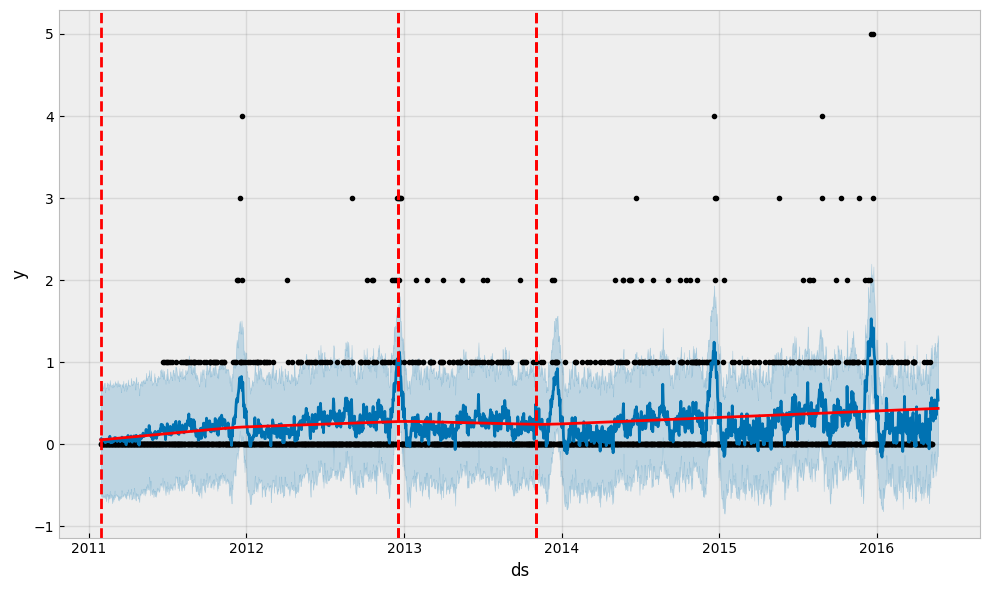

/usr/local/lib/python3.9/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.9/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.9/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on t

/var/folders/xq/5x1ctvtx1mx1dtxfs8h7l4d80000gn/T/ipykernel_7637/1773184814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values
[I 2023-12-11 03:05:48,649] A new study created in memory with name: no-name-32cc2274-7029-40ef-af86-77307e7fa572
/var/folders/xq/5x1ctvtx1mx1dtxfs8h7l4d80000gn/T/ipykernel_7637/1167051525.py:3: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  trial.suggest_uniform('changepoint_prior_scale',
/var/folders/xq/5x1ctvtx1mx1dtxfs8h7l4d80000gn/T/ipykernel_7637/1167051525.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This featu

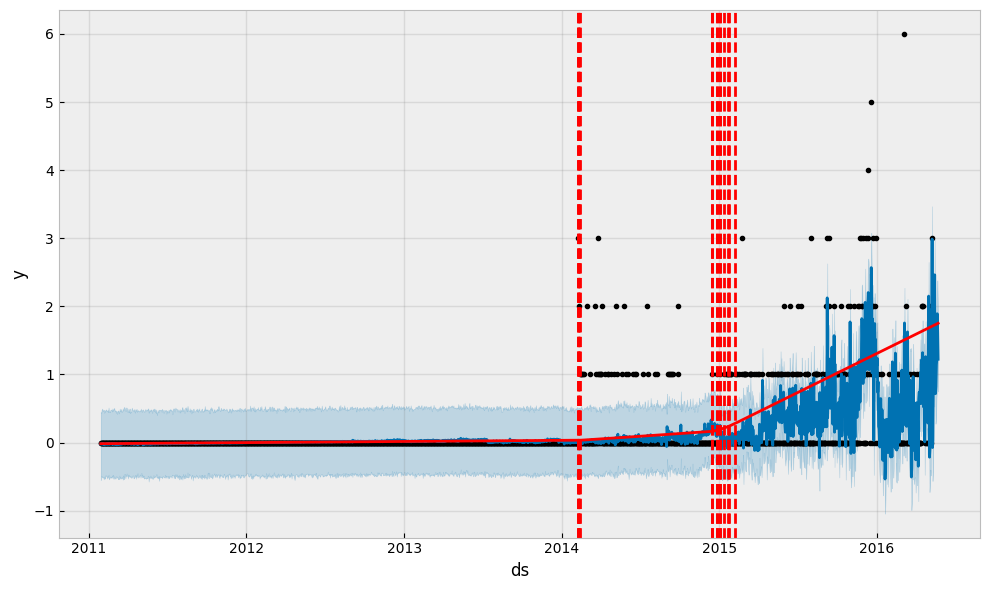

/usr/local/lib/python3.9/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.9/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.9/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on t

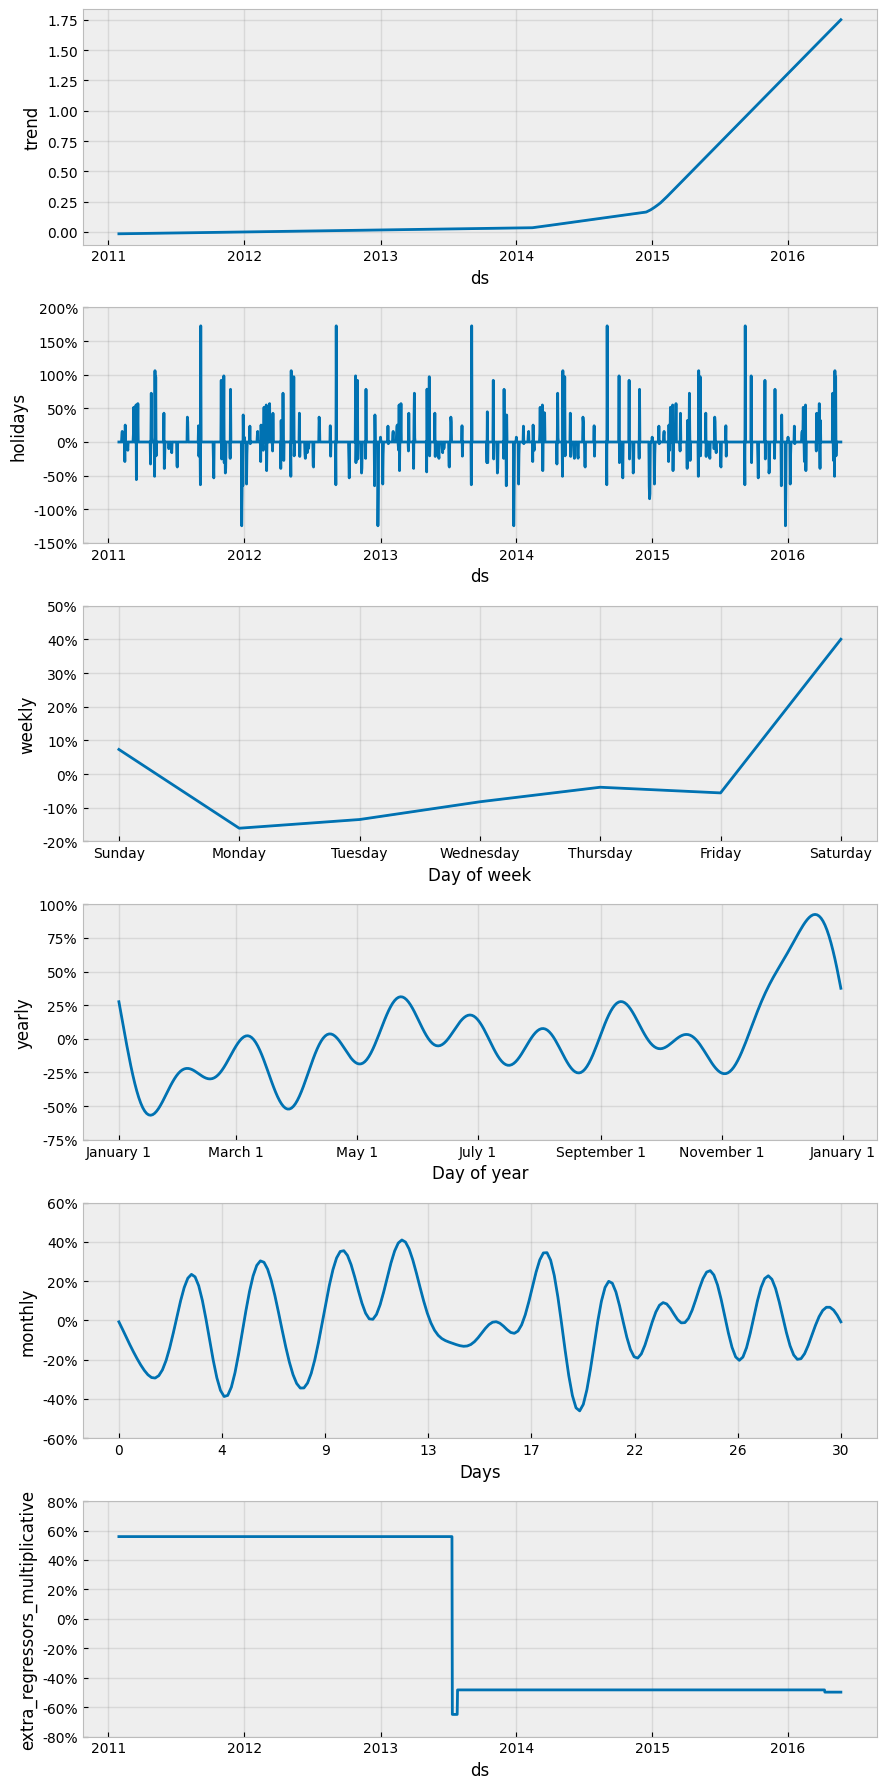

/var/folders/xq/5x1ctvtx1mx1dtxfs8h7l4d80000gn/T/ipykernel_7637/1773184814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values
[I 2023-12-11 03:06:01,613] A new study created in memory with name: no-name-dfadb1e7-7880-4957-bf2b-5d075fe98d88
/var/folders/xq/5x1ctvtx1mx1dtxfs8h7l4d80000gn/T/ipykernel_7637/1167051525.py:3: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  trial.suggest_uniform('changepoint_prior_scale',
/var/folders/xq/5x1ctvtx1mx1dtxfs8h7l4d80000gn/T/ipykernel_7637/1167051525.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This featu

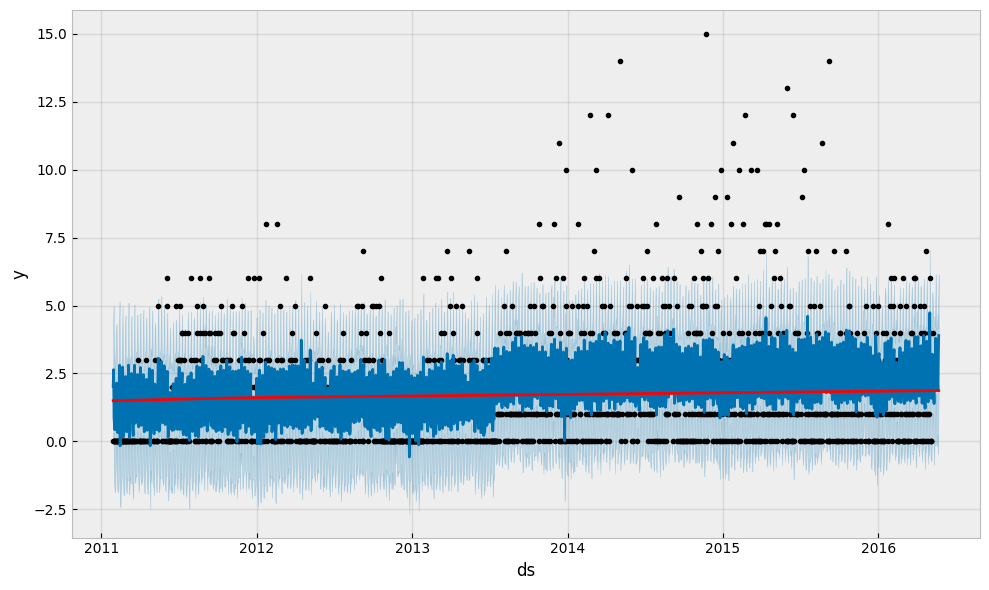

/usr/local/lib/python3.9/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.9/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.9/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on t

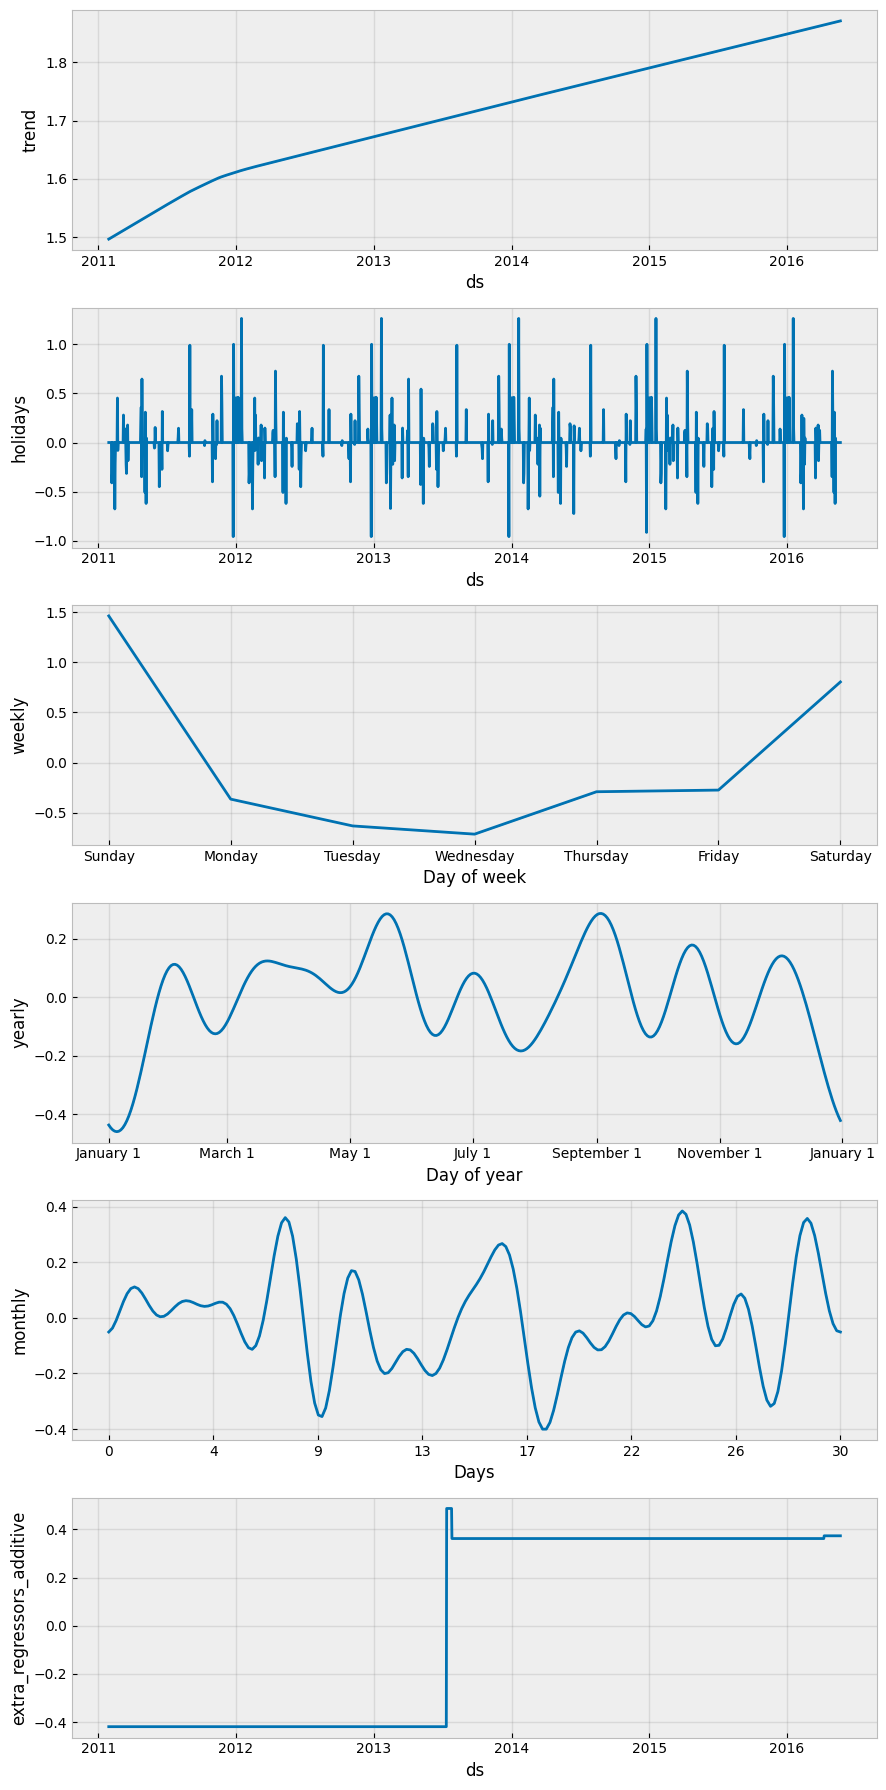

/var/folders/xq/5x1ctvtx1mx1dtxfs8h7l4d80000gn/T/ipykernel_7637/1773184814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values
[I 2023-12-11 03:06:26,679] A new study created in memory with name: no-name-d15eda4a-e387-4c8c-9aa8-c2eb9ba56c16
/var/folders/xq/5x1ctvtx1mx1dtxfs8h7l4d80000gn/T/ipykernel_7637/1167051525.py:3: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  trial.suggest_uniform('changepoint_prior_scale',
/var/folders/xq/5x1ctvtx1mx1dtxfs8h7l4d80000gn/T/ipykernel_7637/1167051525.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This featu

/usr/local/lib/python3.9/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.9/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.9/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on t

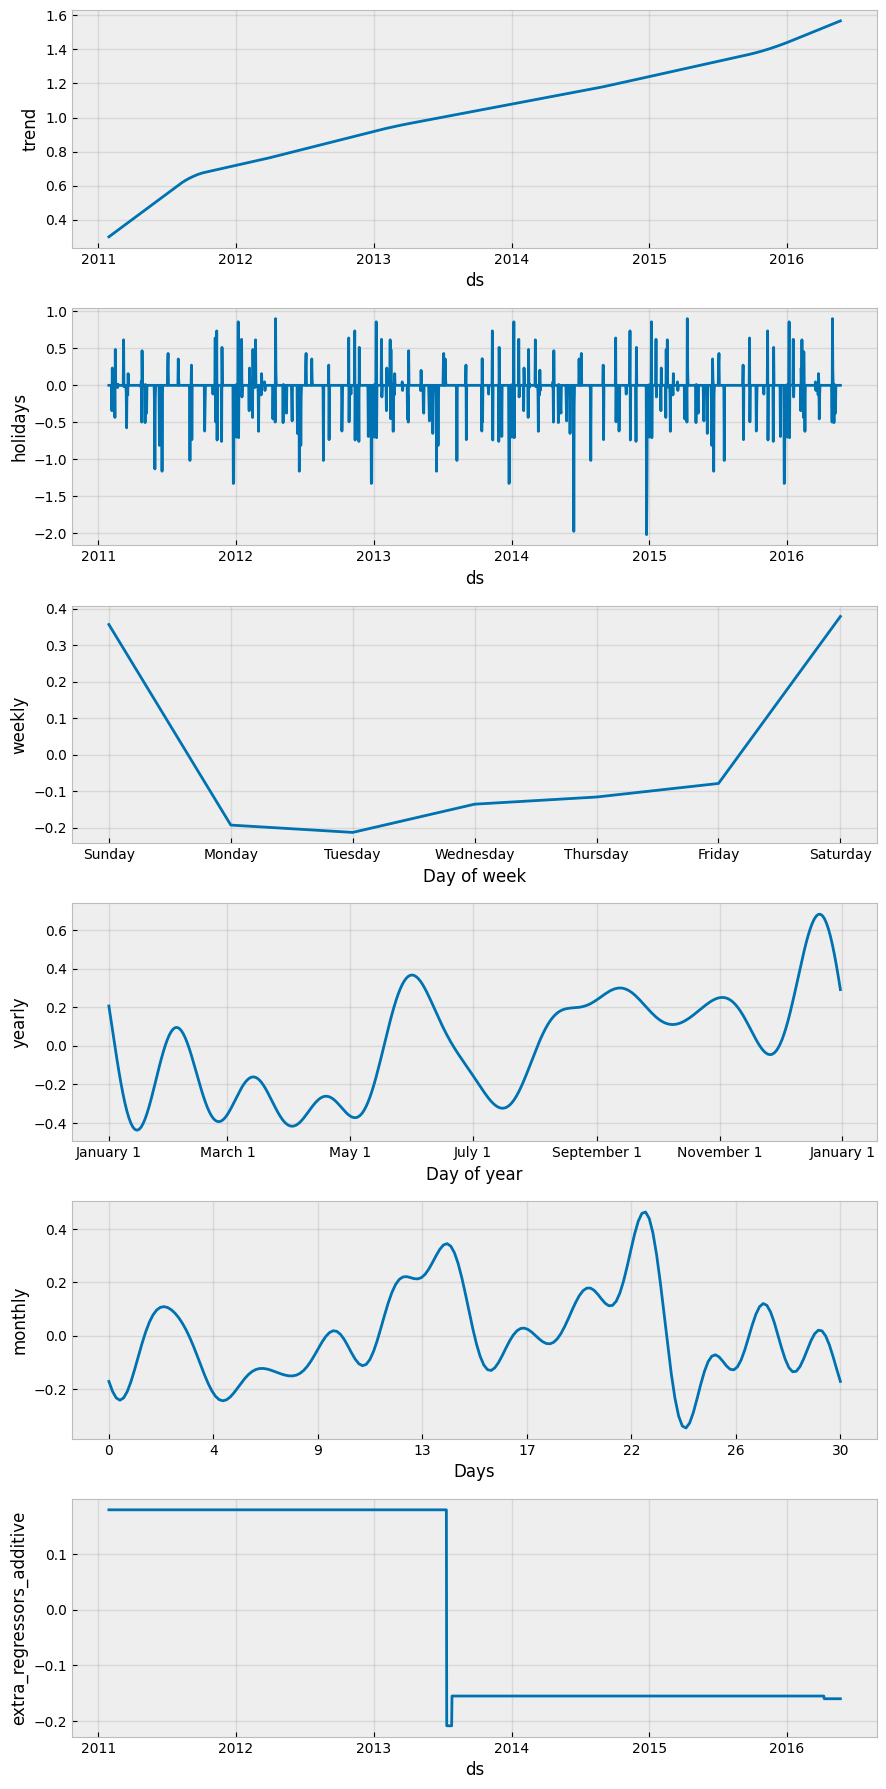

/var/folders/xq/5x1ctvtx1mx1dtxfs8h7l4d80000gn/T/ipykernel_7637/1773184814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values
[I 2023-12-11 03:06:39,957] A new study created in memory with name: no-name-fef574b6-079a-4517-9ead-c87e206fffe3
/var/folders/xq/5x1ctvtx1mx1dtxfs8h7l4d80000gn/T/ipykernel_7637/1167051525.py:3: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  trial.suggest_uniform('changepoint_prior_scale',
/var/folders/xq/5x1ctvtx1mx1dtxfs8h7l4d80000gn/T/ipykernel_7637/1167051525.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This featu

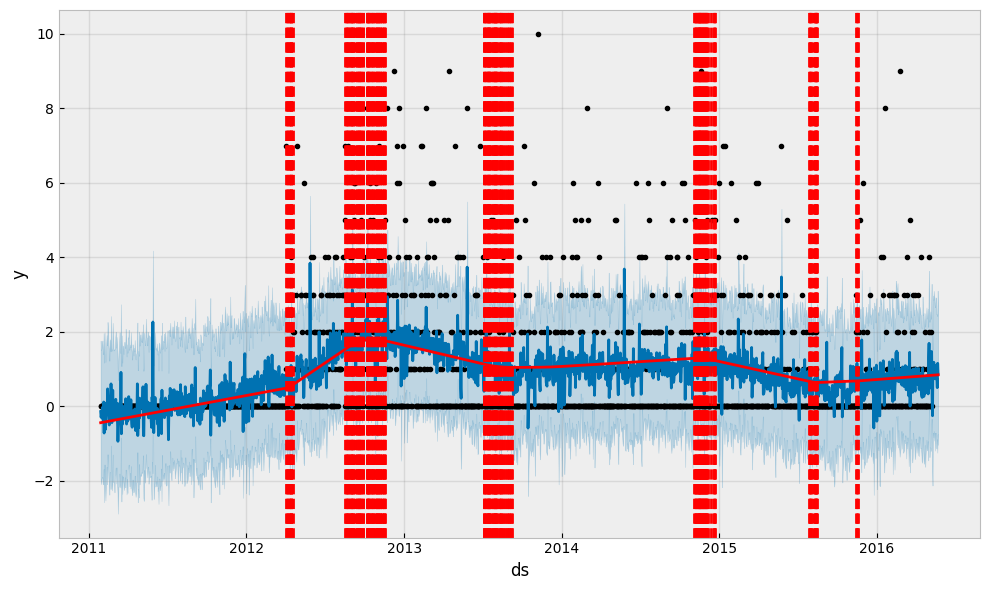

/usr/local/lib/python3.9/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.9/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.9/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on t

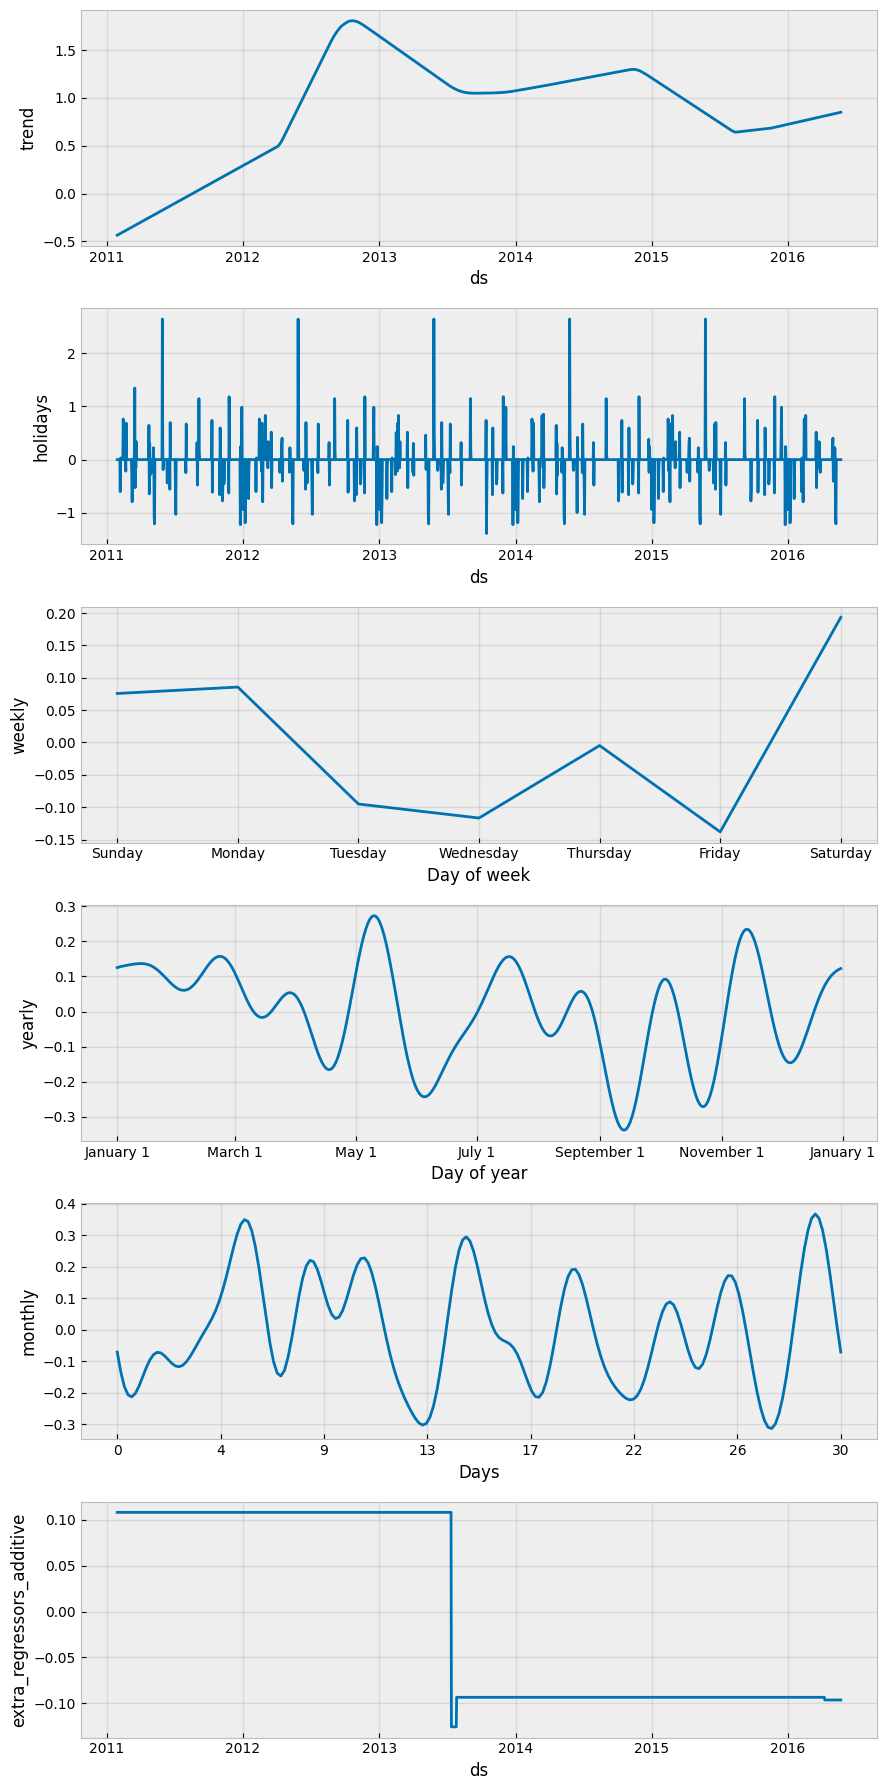

/var/folders/xq/5x1ctvtx1mx1dtxfs8h7l4d80000gn/T/ipykernel_7637/1773184814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values
[I 2023-12-11 03:06:55,917] A new study created in memory with name: no-name-d1407ef3-7657-4a80-8211-b11872fac419
/var/folders/xq/5x1ctvtx1mx1dtxfs8h7l4d80000gn/T/ipykernel_7637/1167051525.py:3: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  trial.suggest_uniform('changepoint_prior_scale',
/var/folders/xq/5x1ctvtx1mx1dtxfs8h7l4d80000gn/T/ipykernel_7637/1167051525.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This featu

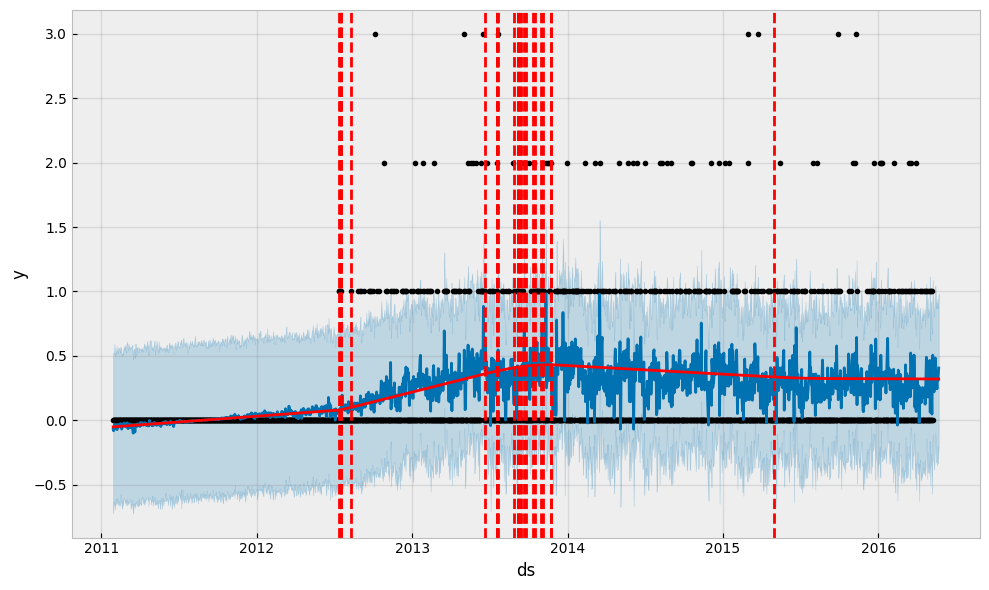

/usr/local/lib/python3.9/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.9/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.9/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on t

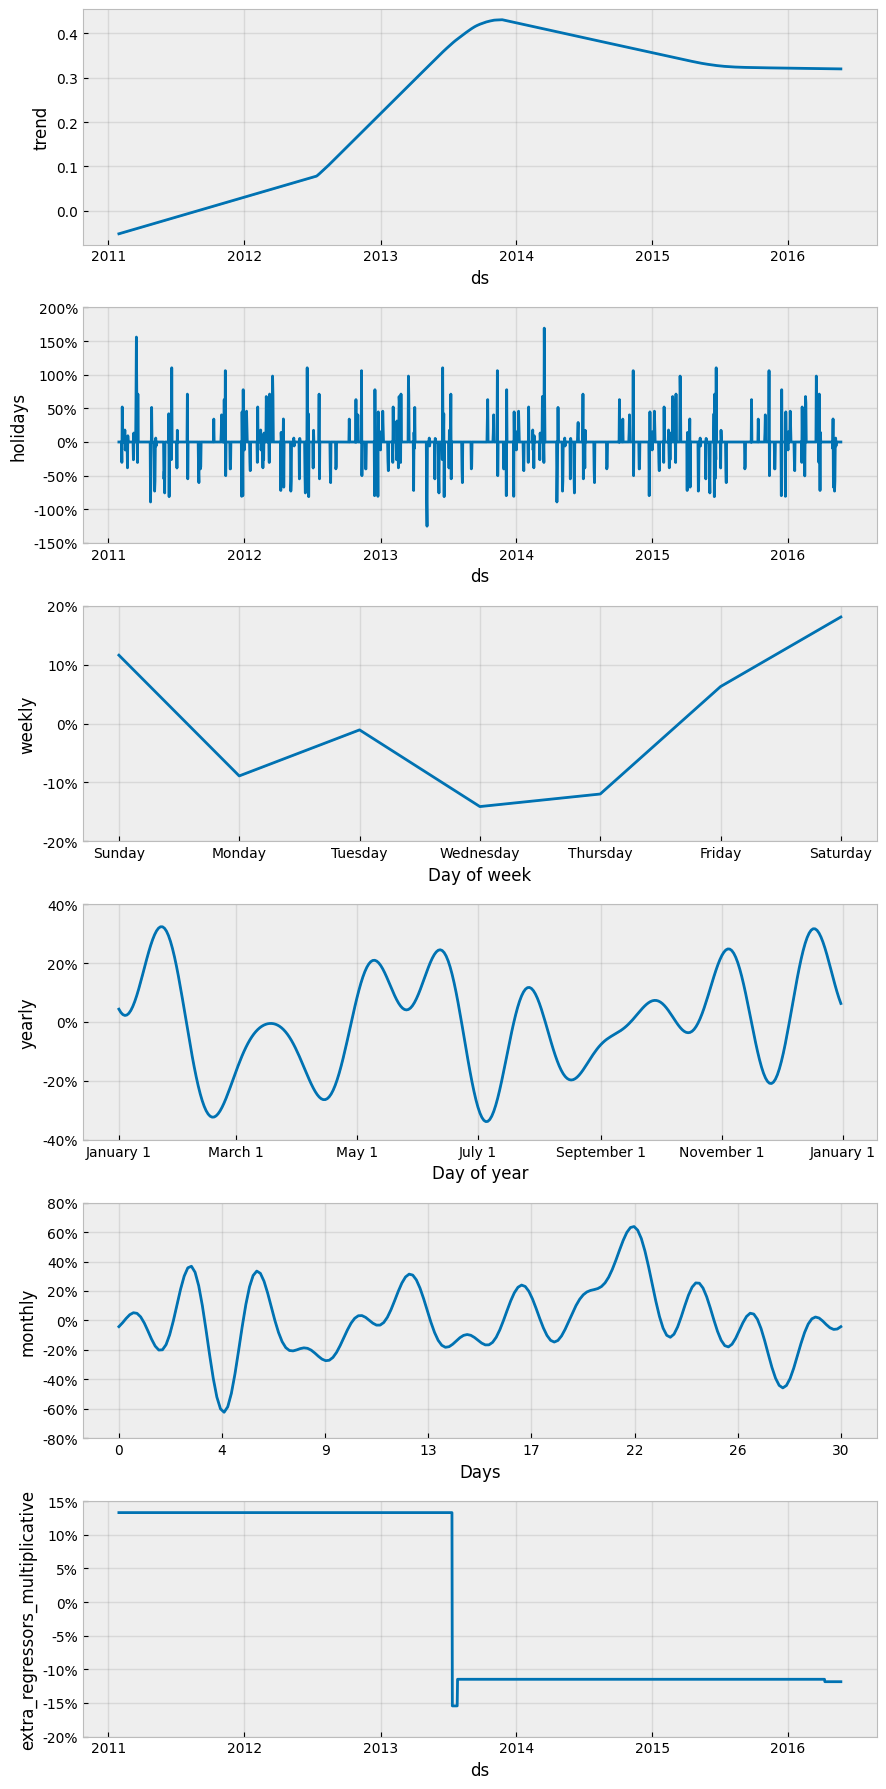

/var/folders/xq/5x1ctvtx1mx1dtxfs8h7l4d80000gn/T/ipykernel_7637/1773184814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values
[I 2023-12-11 03:07:16,463] A new study created in memory with name: no-name-83834a2e-4324-44a4-aa2f-7f453ff8b78c
/var/folders/xq/5x1ctvtx1mx1dtxfs8h7l4d80000gn/T/ipykernel_7637/1167051525.py:3: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  trial.suggest_uniform('changepoint_prior_scale',
/var/folders/xq/5x1ctvtx1mx1dtxfs8h7l4d80000gn/T/ipykernel_7637/1167051525.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This featu

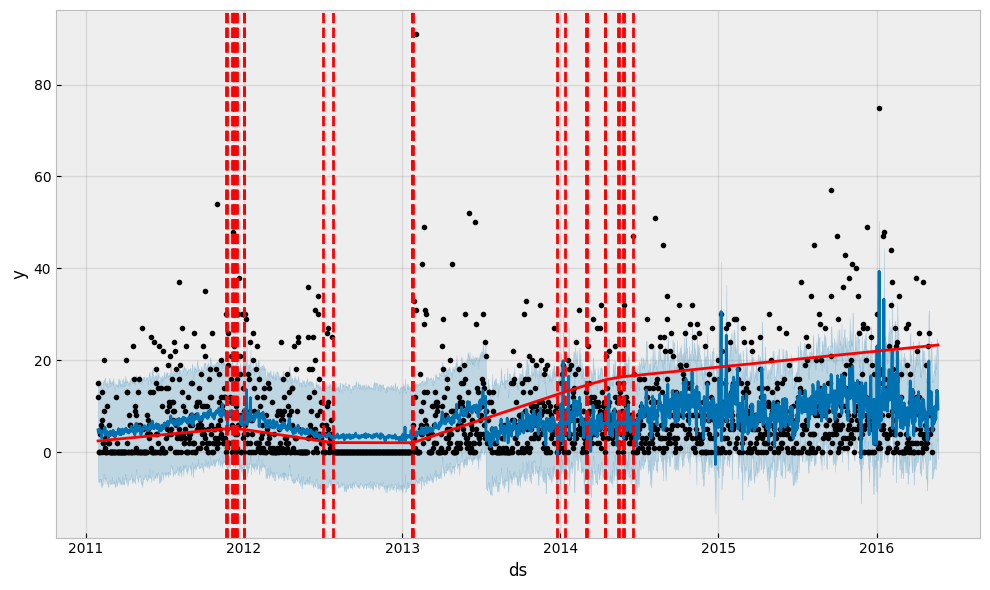

/usr/local/lib/python3.9/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.9/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.9/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on t

/var/folders/xq/5x1ctvtx1mx1dtxfs8h7l4d80000gn/T/ipykernel_7637/1773184814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values
[I 2023-12-11 03:07:31,638] A new study created in memory with name: no-name-fd0a409c-9536-43e3-9ffb-9cfc178db945
/var/folders/xq/5x1ctvtx1mx1dtxfs8h7l4d80000gn/T/ipykernel_7637/1167051525.py:3: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  trial.suggest_uniform('changepoint_prior_scale',
/var/folders/xq/5x1ctvtx1mx1dtxfs8h7l4d80000gn/T/ipykernel_7637/1167051525.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This featu

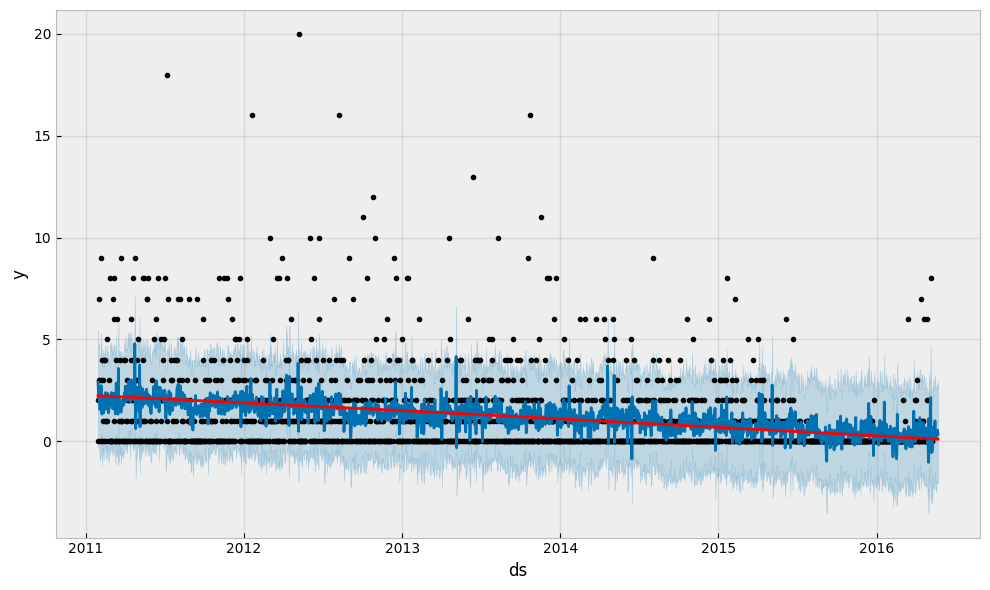

/usr/local/lib/python3.9/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.9/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.9/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on t

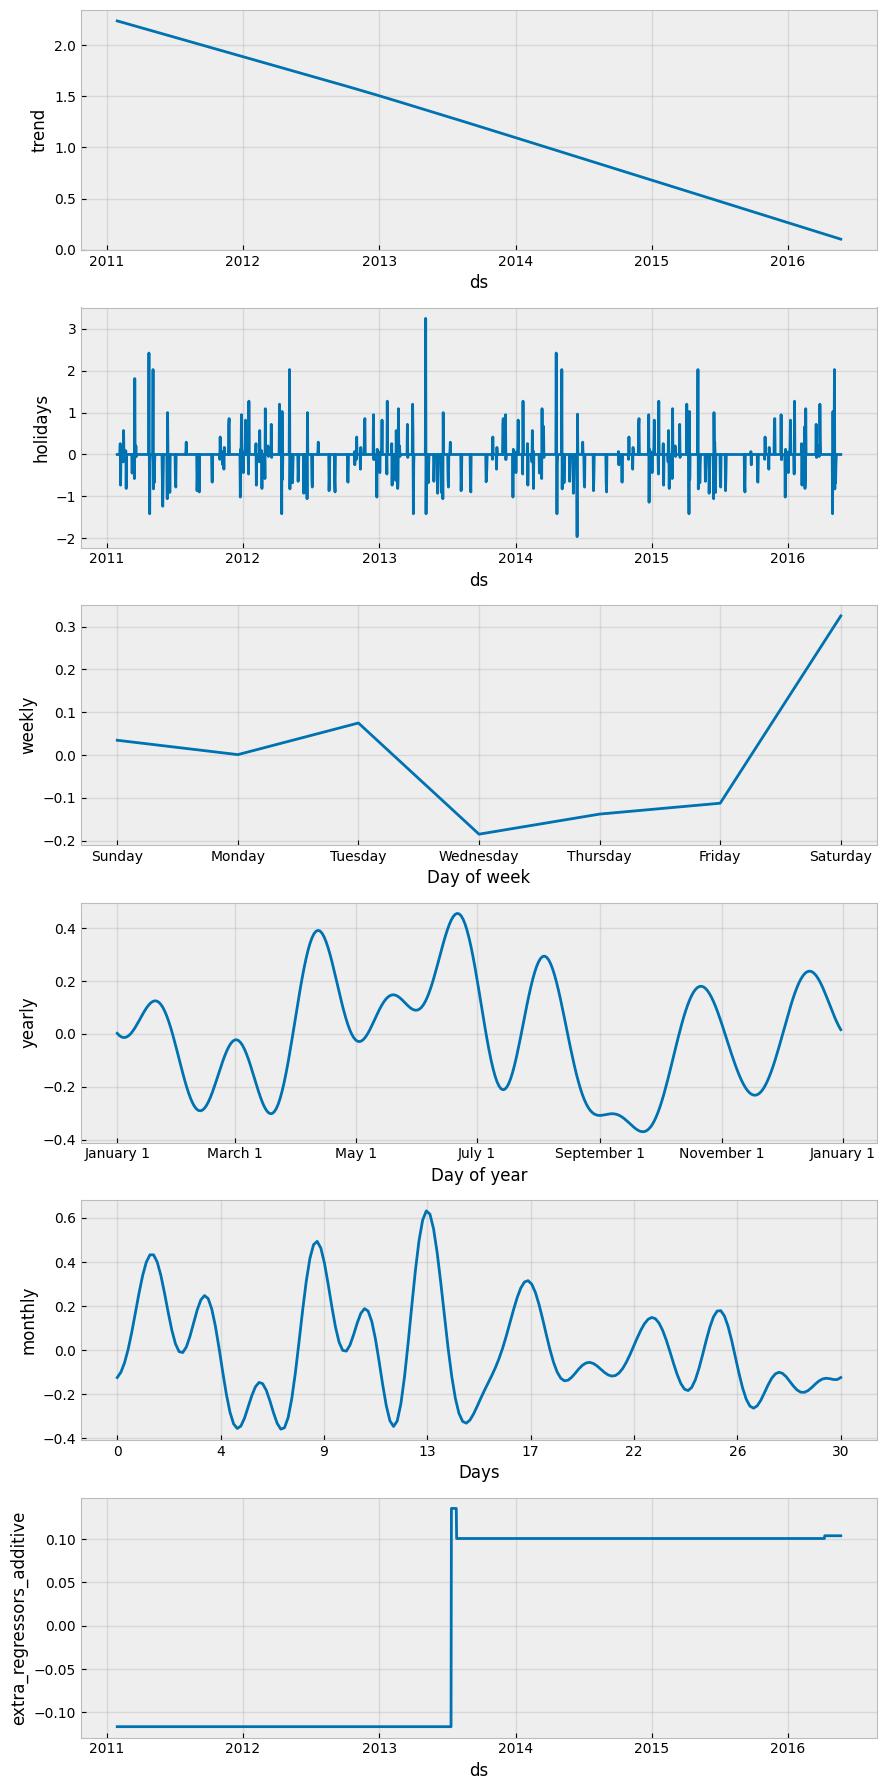

/var/folders/xq/5x1ctvtx1mx1dtxfs8h7l4d80000gn/T/ipykernel_7637/1773184814.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['y'] = train.loc[i,'d_1':].values
[I 2023-12-11 03:07:44,313] A new study created in memory with name: no-name-1112c8ea-8e1a-42c9-95c5-a7371fb9aa92
/var/folders/xq/5x1ctvtx1mx1dtxfs8h7l4d80000gn/T/ipykernel_7637/1167051525.py:3: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  trial.suggest_uniform('changepoint_prior_scale',
/var/folders/xq/5x1ctvtx1mx1dtxfs8h7l4d80000gn/T/ipykernel_7637/1167051525.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This featu

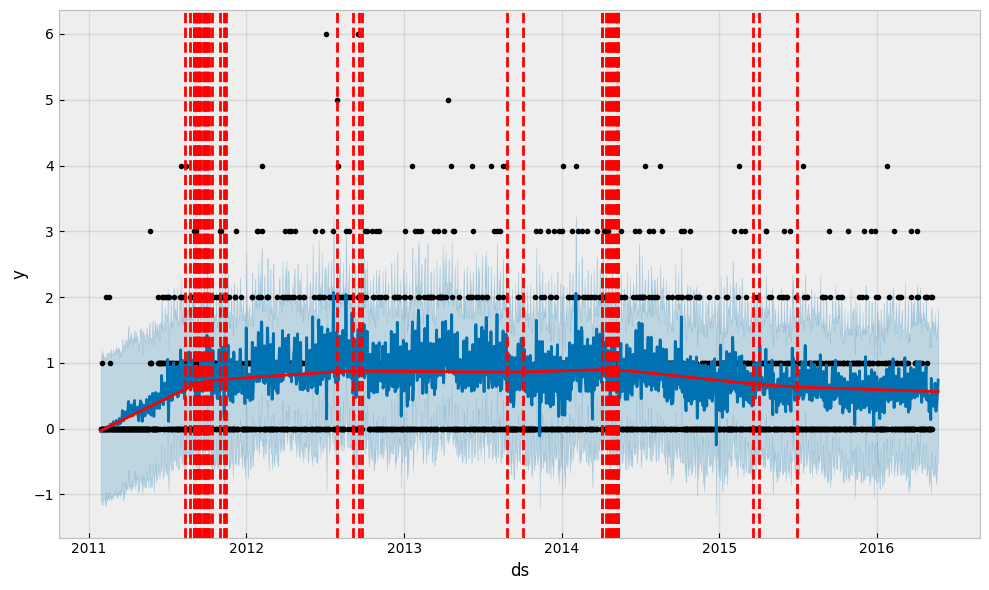

/usr/local/lib/python3.9/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.9/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.9/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on t

In [17]:
submit_df = pd.DataFrame()
for i in range(10):
    df = pd.DataFrame(calendar[['date', 'd', 'wm_yr_wk', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2']])
    df_train =  df.loc[0:1926]
    df_test = df.loc[1927:]

    #学習用df編集，sell_price追加
    df_train['y'] = train.loc[i,'d_1':].values
    df_train = pd.merge(df_train, price[(price['store_id'] == train.loc[i,'store_id']) \
                & (price['item_id'] == train.loc[0,'item_id'])]\
                [['wm_yr_wk', 'sell_price']], how='left', on=['wm_yr_wk'])
    
    df_train = df_train.rename(columns={'date': 'ds'})
    df_train = df_train.fillna({"sell_price":0})
    df_train[0] = False
    
    # change point作成
    index_0 = df_train['y'] == 0
    index_change = index_0 != index_0.shift(1)
    
    change_point = df_train[index_change]["ds"]
    change_point = change_point.reset_index(drop=True)
    
    # optuna
    train_opt = df_train[-200:-100]
    train_opt = train_opt[["ds", "y"]]
    
    val_opt = df_train[-100:]
    val_opt = val_opt[["ds", "y"]]
    
    
    # 最適化
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=5) 
  
    #model定義
    model = Prophet(weekly_seasonality=True, yearly_seasonality=True, holidays=holidays, \
                    **study.best_params,\
                            changepoints=change_point)
    # model = Prophet(weekly_seasonality=True, yearly_seasonality=True)
    
    #周期生追加
    model.add_seasonality(name="monthly", period=30.5, fourier_order=14)
    model.add_seasonality(name="yearly", period=365.25, fourier_order=20)
    
    #説明変数sell_price追加
    model.add_regressor('sell_price')
    
    model.fit(df_train)
    future = model.make_future_dataframe(periods=14)
    future["wm_yr_wk"] = calendar[:len(future)]["wm_yr_wk"]
  
    # futureにsell_price追加
    future = pd.merge(future, price[(price['store_id'] == train.loc[i,'store_id'])\
                    & (price['item_id'] == train.loc[0,'item_id'])] \
                    [['wm_yr_wk',"sell_price"]], how='left', on=['wm_yr_wk'])
    future = future.fillna({"sell_price":0})
    


    # 学習
    forecast = model.predict(future)
    
    fig = model.plot(forecast)
    a = add_changepoints_to_plot(fig.gca(), model, forecast)
    
    plt.show()
    
    model.plot_components(forecast)
    plt.show()
    #df_train.to_csv('df_train' + str(i) + '.csv', index=False)
    yhat_tenchi = forecast[['yhat']].tail(14).T.round(0)
    submit_df = pd.concat([submit_df, yhat_tenchi.reset_index(drop=True)], ignore_index=True)
for i, row in enumerate(submit_df.itertuples(index=False), start=0):
    # start=2 はsample_submitの2行目から始まるため
    # 7列目から始めて、行の各要素を置換する
    for j, value in enumerate(row, start=6):
        sample_submit.iat[i, j] = value

sample_submit.to_csv('submit_edited.csv', index=False)
